In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
df.drop(columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True)

In [ ]:
df.columns = df.columns.str.lower()

#Churn Profiling

i) **Overall Churn Rate**

In [ ]:
def makebin (a):
  if a == 'Existing Customer':
    return 0
  else:
    return 1

df['attrition_flag'] = df['attrition_flag'].apply(makebin)

In [ ]:
df['attrition_flag'].value_counts(normalize=True)

,proportion
attrition_flag,
0,0.83934
1,0.16066


In [ ]:
baseline_churn = df['attrition_flag'].mean()*100
print('baseline churn rate = ',baseline_churn)

baseline churn rate =  16.065962279055988


ii) **Univariate profiling**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   attrition_flag            10127 non-null  int64  
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

# Feature explanation:-

**demographics features**:-
1. clientnum : unique identifier of each client/customer
2. attrition flag: shows if the customer churned
3. gender: M or F
4. dependent_count: spouse, number of children
5. education_level: shows level of literacy
6. marital_status: married/single
7. income_category: shows distribution according to income

**Account features**:-
8. card_category: which type of card the customer hold. for eg:- blue, silver, gold, platinum. Higher categories means higher premium benefits offered.
9. months_on_book: tenure/time for which customer stayed with the bank
10. total_relationship_count: total number of products customer has with the bank (credit card, loan, investment, savings account, etc)). more the products, stickier the customer is with the bank.

**Customer engagement features**:-
11. months_inactive_12_mon: number of months the customer is inactive. more inactivity, more chances of churning
12. contacts_count_12_mon: number of times the customer contacted the bank on the span of last 12 months. More the contacts, more dissatisfied the customer might be.

**Credit and balance features**:-
13. credit_limit: amount a customer can borrow from the bank
14. total_revolving_bal: amount of credit that is unpaid
15. avg_open_to_buy: amount of credit customer still has. for eg: customer's credit limit is 10k and he already borrowed 3k. So, avg_open_to_buy becomes 10k - 3k = 7k.

**Transaction behaviour features**:-
16. total_amt_chng_q4_q1: transaction amount changed between quarter 4 and quarter 1. if ratio > 1, customer spending more and if ratio < 1, customer spending less.
17. total_trans_amt: total spending of customer in past year
18. total_trans_ct: total number of transactions/transaction count of last year.
19. total_ct_chng_q4_q1: change in count of transaction from q4 to q1. if ratio > 1, then using credit card more often and if ratio < 1, using credit card less often.

**Utilization feature**:-
20. avg_utilization_ratio: it indicates the utilization of credit card by the customer. if customer has credit limit of 10k, and he is using 3k on average, avg_utilization_ratio = 0.3 or 30%. if it is low (0-20%), customer is less risky as not too much credit to owe. if 20-50%, healthy usage and good sign as customer is enjoying using bank's credit card service. if it is high (>80%), customer heavily dependent on credit card, high risk of default, and usually higher churn.

In [ ]:
df_cpy = df.copy()

In [ ]:
cat_cols = ['gender', 'marital_status']

for col in cat_cols:
  print(f'\nSegment Churn rate for {col}:')
  a = df_cpy.groupby(col)['attrition_flag'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
  print(a)


Segment Churn rate for gender:
            mean  count
gender                 
F       0.173572   5358
M       0.146152   4769

Segment Churn rate for marital_status:
                    mean  count
marital_status                 
Unknown         0.172230    749
Single          0.169414   3943
Divorced        0.161765    748
Married         0.151269   4687


In [ ]:
def ed (lvl):
  if lvl == 'Uneducated' or lvl == 'High School' or lvl == 'Unknown':
    return 'low'
  elif lvl == 'College' or lvl == 'Graduate':
    return 'medium'
  else:
    return 'high'

def income (inc):
  if inc == 'Less than $40K' or inc == 'Unknown':
    return '<40k'
  elif inc == '$40K - $60K' or inc == '$60K - $80K':
    return '40k-80k'
  else:
    return '>80k'

df_cpy['education_level'] = df_cpy['education_level'].apply(ed)
df_cpy['income_category'] = df_cpy['income_category'].apply(income)

columns = ['education_level', 'income_category']

for col in columns:
  a = df_cpy.groupby(col)['attrition_flag'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
  print(f'\nSegment churn rate for {col}:')
  print(a)


Segment churn rate for education_level:
                     mean  count
education_level                 
high             0.193382    967
low              0.159195   5019
medium           0.154794   4141

Segment churn rate for income_category:
                     mean  count
income_category                 
<40k             0.170982   4673
>80k             0.162688   2262
40k-80k          0.144110   3192


In [ ]:
num_cols = df.select_dtypes(include=['number']).columns
print(num_cols)

Index(['clientnum', 'attrition_flag', 'customer_age', 'dependent_count',
       'months_on_book', 'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'],
      dtype='object')


In [ ]:
for col in num_cols:
  print(f'\nmin {col}=', df[col].min())
  print(f'\nmax {col}=', df[col].max())



min clientnum= 708082083

max clientnum= 828343083

min attrition_flag= 0

max attrition_flag= 1

min customer_age= 26

max customer_age= 73

min dependent_count= 0

max dependent_count= 5

min months_on_book= 13

max months_on_book= 56

min total_relationship_count= 1

max total_relationship_count= 6

min months_inactive_12_mon= 0

max months_inactive_12_mon= 6

min contacts_count_12_mon= 0

max contacts_count_12_mon= 6

min credit_limit= 1438.3

max credit_limit= 34516.0

min total_revolving_bal= 0

max total_revolving_bal= 2517

min avg_open_to_buy= 3.0

max avg_open_to_buy= 34516.0

min total_amt_chng_q4_q1= 0.0

max total_amt_chng_q4_q1= 3.397

min total_trans_amt= 510

max total_trans_amt= 18484

min total_trans_ct= 10

max total_trans_ct= 139

min total_ct_chng_q4_q1= 0.0

max total_ct_chng_q4_q1= 3.714

min avg_utilization_ratio= 0.0

max avg_utilization_ratio= 0.999


In [ ]:
#df_cpy = df.copy()

In [ ]:
'''
customer_age = 5 done
dependent_count = 6
months_on_book = 5 done
total_relationship_count = 6
months_inactive_12_mon = 7
contacts_count_12_mon = 7
credit_limit = 5 done
total_revolving_bal = 5 done
avg_open_to_buy = 5 done
total_amt_chng_q4_q1 = 4 --->
total_trans_amt = 5 done
total_trans_ct = 5 done
total_ct_chng_q4_q1 = 4 --->
avg_utilization_ratio = 2 --->
'''

'\ncustomer_age = 5 done\ndependent_count = 6\nmonths_on_book = 5 done\ntotal_relationship_count = 6\nmonths_inactive_12_mon = 7\ncontacts_count_12_mon = 7\ncredit_limit = 5 done\ntotal_revolving_bal = 5 done\navg_open_to_buy = 5 done\ntotal_amt_chng_q4_q1 = 4 --->\ntotal_trans_amt = 5 done\ntotal_trans_ct = 5 done\ntotal_ct_chng_q4_q1 = 4 --->\navg_utilization_ratio = 2 --->\n'

In [ ]:
num_cols_to_cat = ['customer_age', 'credit_limit', 'total_revolving_bal', 'avg_open_to_buy', 'total_trans_amt', 'total_trans_ct']

for col in num_cols_to_cat:
  bins = np.linspace(df_cpy[col].min(), df_cpy[col].max(), 5)
  bins = np.round(bins, 1)
  df_cpy[col] = pd.cut(df_cpy[col], bins=bins, include_lowest=True)
  print('unique values for this column are: ',df_cpy[col].unique())

unique values for this column are:  [(37.8, 49.5], (49.5, 61.2], (25.999, 37.8], (61.2, 73.0]]
Categories (4, interval[float64, right]): [(25.999, 37.8] < (37.8, 49.5] < (49.5, 61.2] <
                                           (61.2, 73.0]]
unique values for this column are:  [(9707.7, 17977.1], (1438.299, 9707.7], (26246.6, 34516.0], (17977.1, 26246.6]]
Categories (4, interval[float64, right]): [(1438.299, 9707.7] < (9707.7, 17977.1] < (17977.1, 26246.6] <
                                           (26246.6, 34516.0]]
unique values for this column are:  [(629.2, 1258.5], (-0.001, 629.2], (1887.8, 2517.0], (1258.5, 1887.8]]
Categories (4, interval[float64, right]): [(-0.001, 629.2] < (629.2, 1258.5] < (1258.5, 1887.8] <
                                           (1887.8, 2517.0]]
unique values for this column are:  [(8631.2, 17259.5], (2.999, 8631.2], (25887.8, 34516.0], (17259.5, 25887.8]]
Categories (4, interval[float64, right]): [(2.999, 8631.2] < (8631.2, 17259.5] < (17259.5, 2588

In [ ]:
category_columns = ['customer_age', 'credit_limit', 'total_revolving_bal', 'avg_open_to_buy', 'total_trans_amt', 'total_trans_ct']

for col in category_columns:
  a = df_cpy.groupby(col)['attrition_flag'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
  print(f'\nSegment churn rate for {col}:')
  print(a)


Segment churn rate for customer_age:
                    mean  count
customer_age                   
(37.8, 49.5]    0.166827   5197
(49.5, 61.2]    0.166563   3218
(61.2, 73.0]    0.131410    312
(25.999, 37.8]  0.130714   1400

Segment churn rate for credit_limit:
                        mean  count
credit_limit                       
(1438.299, 9707.7]  0.166713   7270
(26246.6, 34516.0]  0.159613    827
(9707.7, 17977.1]   0.147989   1392
(17977.1, 26246.6]  0.120690    638

Segment churn rate for total_revolving_bal:
                         mean  count
total_revolving_bal                 
(-0.001, 629.2]      0.379210   2761
(1887.8, 2517.0]     0.131868   2093
(629.2, 1258.5]      0.074842   2218
(1258.5, 1887.8]     0.045172   3055

Segment churn rate for avg_open_to_buy:
                        mean  count
avg_open_to_buy                    
(25887.8, 34516.0]  0.166876    797
(2.999, 8631.2]     0.162781   7292
(8631.2, 17259.5]   0.161972   1420
(17259.5, 25887.8]  0.124595

/tmp/ipython-input-4039773603.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = df_cpy.groupby(col)['attrition_flag'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
/tmp/ipython-input-4039773603.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = df_cpy.groupby(col)['attrition_flag'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
/tmp/ipython-input-4039773603.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defa

In [ ]:
def f1 (ratio):
  if ratio >=0 and ratio < 0.2:
    return '0-19'
  elif ratio>=0.2 and ratio <0.6:
    return '20-59'
  else:
    return '60+'

def f2 (ratio):
  if ratio <0.7:
    return '0-0.7'
  elif ratio>0.7 and ratio < 1:
    return '0.7-1'
  elif ratio >=1 and ratio<=1.3:
    return '1-1.3'
  else:
    return '>1.3'

def f3 (ratio):
  if ratio <0.7:
    return '0-0.7'
  elif ratio>0.7 and ratio < 1:
    return '0.7-1'
  elif ratio >=1 and ratio<=1.3:
    return '1-1.3'
  else:
    return '>1.3'

def f4 (months):
  if months>=13 and months<=24:
    return '13-24'
  elif months>24 and months<36:
    return '25-36'
  elif months>36 and months<=48:
    return '37-48'
  else:
    return '>48'

df_cpy['avg_utilization_ratio'] = df_cpy['avg_utilization_ratio'].apply(f1)
print(df_cpy['avg_utilization_ratio'].unique())

df_cpy['total_amt_chng_q4_q1'] = df_cpy['total_amt_chng_q4_q1'].apply(f2)
print(df_cpy['total_amt_chng_q4_q1'].unique())

df_cpy['total_ct_chng_q4_q1'] = df_cpy['total_ct_chng_q4_q1'].apply(f3)
print(df_cpy['total_ct_chng_q4_q1'].unique())

df_cpy['months_on_book'] = df_cpy['months_on_book'].apply(f4)
print(df_cpy['months_on_book'].unique())


['0-19' '60+' '20-59']
['>1.3' '0.7-1' '1-1.3' '0-0.7']
['>1.3' '0.7-1' '1-1.3' '0-0.7']
['37-48' '>48' '25-36' '13-24']


In [ ]:
cat_2 = ['total_amt_chng_q4_q1', 'total_ct_chng_q4_q1', 'avg_utilization_ratio', 'months_on_book']

for col in cat_2:
  a = df_cpy.groupby(col)['attrition_flag'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
  print(f'\nSegment churn rate for {col}:')
  print(a)


Segment churn rate for total_amt_chng_q4_q1:
                          mean  count
total_amt_chng_q4_q1                 
0-0.7                 0.197084   4115
1-1.3                 0.182415    762
0.7-1                 0.134750   4987
>1.3                  0.019011    263

Segment churn rate for total_ct_chng_q4_q1:
                         mean  count
total_ct_chng_q4_q1                 
0-0.7                0.246649   4999
1-1.3                0.082569    654
0.7-1                0.077450   4235
>1.3                 0.050209    239

Segment churn rate for avg_utilization_ratio:
                           mean  count
avg_utilization_ratio                 
0-19                   0.222910   5334
60+                    0.100275   1815
20-59                  0.085964   2978

Segment churn rate for months_on_book:
                    mean  count
months_on_book                 
>48             0.173509   3118
37-48           0.161833   3207
25-36           0.149239   2955
13-24           0

In [ ]:
c = df_cpy.groupby('card_category')['attrition_flag'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
print(f'\nSegment churn rate for card_category:')
print(c)


Segment churn rate for card_category:
                   mean  count
card_category                 
Platinum       0.250000     20
Gold           0.181034    116
Blue           0.160979   9436
Silver         0.147748    555


In [ ]:
def func(c):
  if c == 0:
    return '0'
  elif c>=1 and c<=3:
    return '1-3'
  else:
    return '4+'

def func2(c):
  if c == 1:
    return '1'
  elif c==2 or c==3:
    return '2-3'
  else:
    return '4+'

discrete_col = ['dependent_count', 'months_inactive_12_mon', 'contacts_count_12_mon']

for col in discrete_col:
  df_cpy[col] = df_cpy[col].apply(func)
  a = df_cpy.groupby(col)['attrition_flag'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
  print(f'\nSegment churn rate for {col}:')
  print(a)

df_cpy['total_relationship_count'] = df_cpy['total_relationship_count'].apply(func2)
a = df_cpy.groupby('total_relationship_count')['attrition_flag'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
print(f'\nSegment churn rate for total_relationship_count:')
print(a)


Segment churn rate for dependent_count:
                     mean  count
dependent_count                 
4+               0.162162   1998
1-3              0.161661   7225
0                0.149336    904

Segment churn rate for months_inactive_12_mon:
                            mean  count
months_inactive_12_mon                 
0                       0.517241     29
4+                      0.245590    737
1-3                     0.152868   9361

Segment churn rate for contacts_count_12_mon:
                           mean  count
contacts_count_12_mon                 
4+                     0.263872   1622
1-3                    0.147052   8106
0                      0.017544    399

Segment churn rate for total_relationship_count:
                              mean  count
total_relationship_count                 
1                         0.256044    910
2-3                       0.210259   3548
4+                        0.114306   5669


iii) **Bivariate profiling**

In [ ]:
df_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   clientnum                 10127 non-null  int64   
 1   attrition_flag            10127 non-null  int64   
 2   customer_age              10127 non-null  category
 3   gender                    10127 non-null  object  
 4   dependent_count           10127 non-null  object  
 5   education_level           10127 non-null  object  
 6   marital_status            10127 non-null  object  
 7   income_category           10127 non-null  object  
 8   card_category             10127 non-null  object  
 9   months_on_book            10127 non-null  object  
 10  total_relationship_count  10127 non-null  object  
 11  months_inactive_12_mon    10127 non-null  object  
 12  contacts_count_12_mon     10127 non-null  object  
 13  credit_limit              10127 non-null  cate

i) Demographics Bivariate profiling

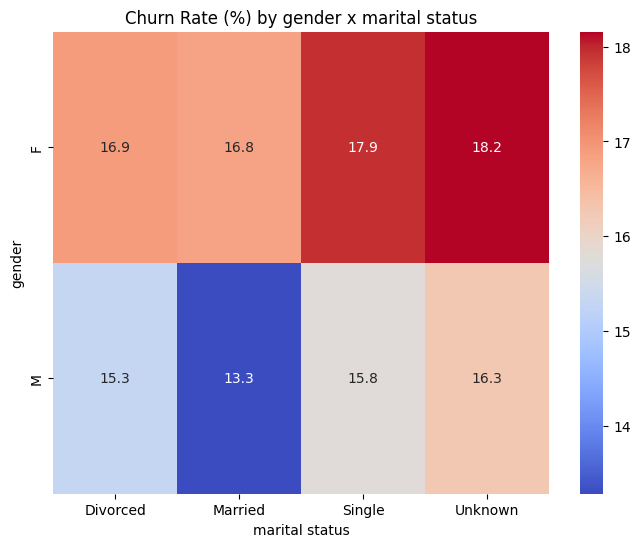

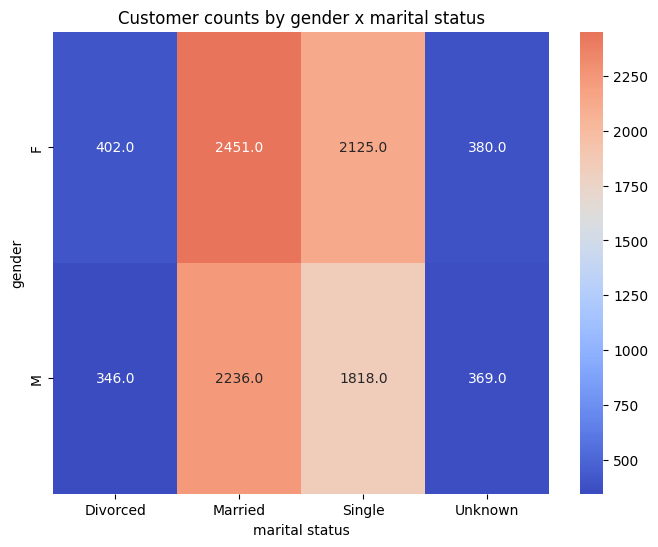

In [ ]:
#gender vs marital status

pivot_rate = pd.pivot_table(df_cpy,
                            values = 'attrition_flag',
                            index = 'gender',
                            columns = 'marital_status',
                            aggfunc = 'mean')*100

pivot_size = pd.pivot_table(df_cpy,
                            values = 'attrition_flag',
                            index = 'gender',
                            columns = 'marital_status',
                            aggfunc = 'size')


plt.figure(figsize=(8,6))
sns.heatmap(pivot_rate, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Churn Rate (%) by gender x marital status")
plt.xlabel("marital status")
plt.ylabel("gender")
plt.savefig("gender_vs_marital_rate.png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(pivot_size, annot=True, fmt=".1f", cmap="coolwarm", center=baseline_churn*100)
plt.title("Customer counts by gender x marital status")
plt.xlabel("marital status")
plt.ylabel("gender")
plt.savefig("gender_vs_marital_size.png", dpi=300, bbox_inches="tight")
plt.show()


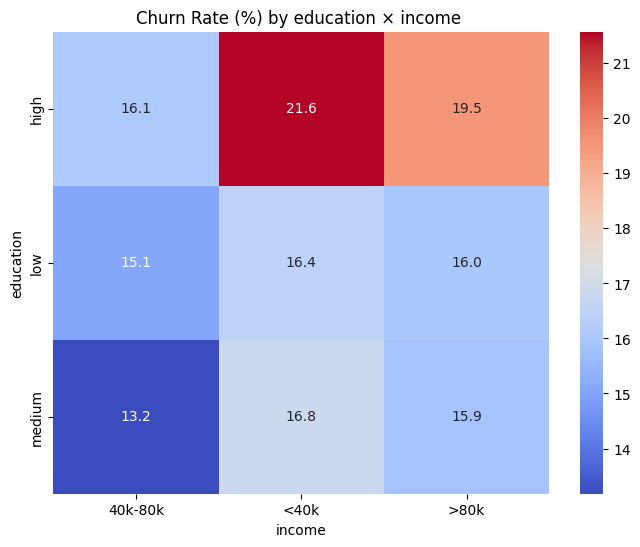

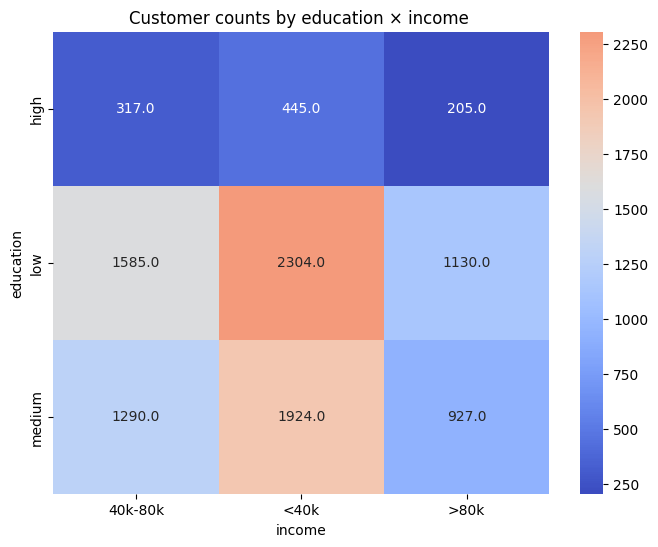

In [ ]:
#education vs income category
pivot_rate = pd.pivot_table(df_cpy,
                            values = 'attrition_flag',
                            index = 'education_level',
                            columns = 'income_category',
                            aggfunc = 'mean')*100

pivot_size = pd.pivot_table(df_cpy,
                            values = 'attrition_flag',
                            index = 'education_level',
                            columns = 'income_category',
                            aggfunc = 'size')

plt.figure(figsize=(8,6))
sns.heatmap(pivot_rate, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Churn Rate (%) by education × income ")
plt.xlabel("income")
plt.ylabel("education")
plt.savefig("ed_vs_inc_rate.png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(pivot_size, annot=True, fmt=".1f", cmap="coolwarm", center=baseline_churn*100)
plt.title("Customer counts by education × income ")
plt.xlabel("income")
plt.ylabel("education")
plt.savefig("ed_vs_inc_size.png", dpi=300, bbox_inches="tight")
plt.show()

ii) Engagement Bivariate profiling

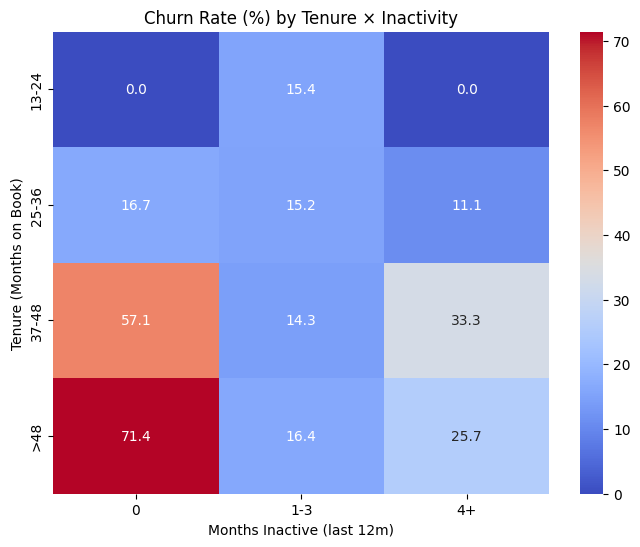

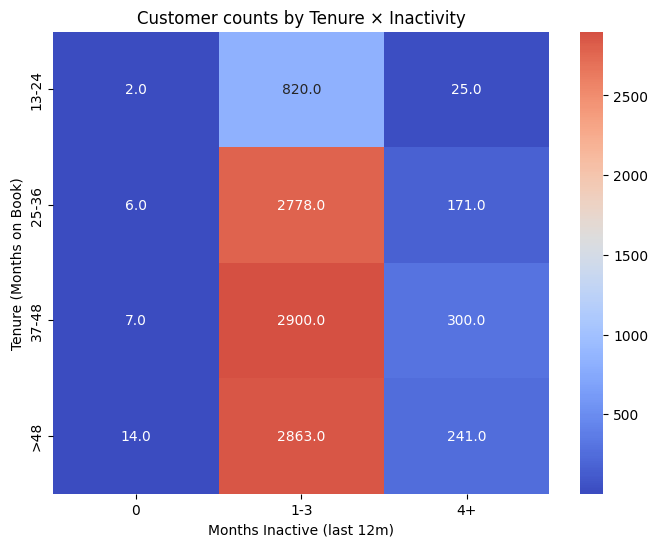

In [ ]:
#months_on_book (tenure) vs months_inactive_12_mon (inactivity)
pivot_rate = pd.pivot_table(df_cpy,
                            values = 'attrition_flag',
                            index = 'months_on_book',
                            columns = 'months_inactive_12_mon',
                            aggfunc = 'mean')*100

pivot_size = pd.pivot_table(df_cpy,
                            values = 'attrition_flag',
                            index = 'months_on_book',
                            columns = 'months_inactive_12_mon',
                            aggfunc = 'size')

plt.figure(figsize=(8,6))
sns.heatmap(pivot_rate, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Churn Rate (%) by Tenure × Inactivity")
plt.xlabel("Months Inactive (last 12m)")
plt.ylabel("Tenure (Months on Book)")
plt.savefig("tenure_vs_inactivity_rate.png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(pivot_size, annot=True, fmt=".1f", cmap="coolwarm", center=baseline_churn*100)
plt.title("Customer counts by Tenure × Inactivity")
plt.xlabel("Months Inactive (last 12m)")
plt.ylabel("Tenure (Months on Book)")
plt.savefig("tenure_vs_inactivity_size.png", dpi=300, bbox_inches="tight")
plt.show()

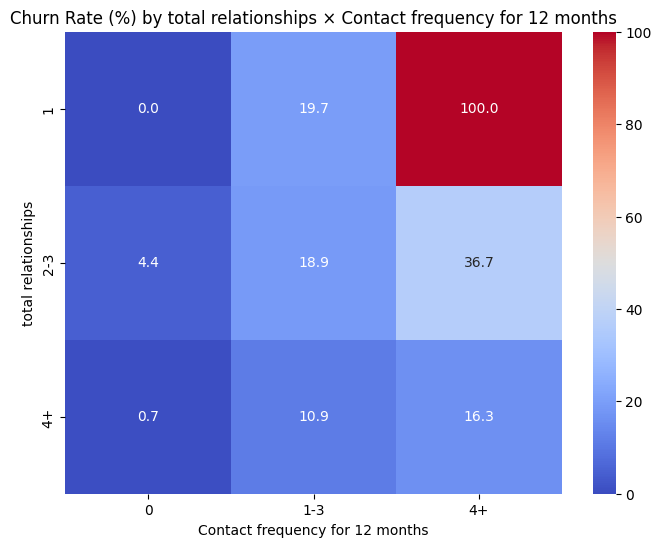

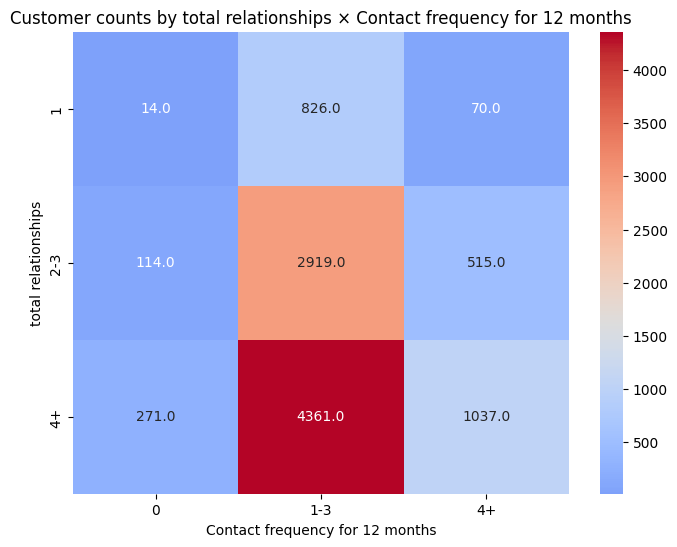

In [ ]:
#total_relationship_count vs contacts_count_12_mon
pivot_rate = pd.pivot_table(df_cpy,
                            values = 'attrition_flag',
                            index = 'total_relationship_count',
                            columns = 'contacts_count_12_mon',
                            aggfunc = 'mean')*100

pivot_size = pd.pivot_table(df_cpy,
                            values = 'attrition_flag',
                            index = 'total_relationship_count',
                            columns = 'contacts_count_12_mon',
                            aggfunc = 'size')


plt.figure(figsize=(8,6))
sns.heatmap(pivot_rate, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Churn Rate (%) by total relationships × Contact frequency for 12 months")
plt.xlabel("Contact frequency for 12 months")
plt.ylabel("total relationships")
plt.savefig("prod_vs_contacts_rate.png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(pivot_size, annot=True, fmt=".1f", cmap="coolwarm", center=baseline_churn*100)
plt.title("Customer counts by total relationships × Contact frequency for 12 months")
plt.xlabel("Contact frequency for 12 months")
plt.ylabel("total relationships")
plt.savefig("prod_vs_contacts_size.png", dpi=300, bbox_inches="tight")
plt.show()

/tmp/ipython-input-79062077.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_rate = pd.pivot_table(df_cpy,
/tmp/ipython-input-79062077.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_size = pd.pivot_table(df_cpy,


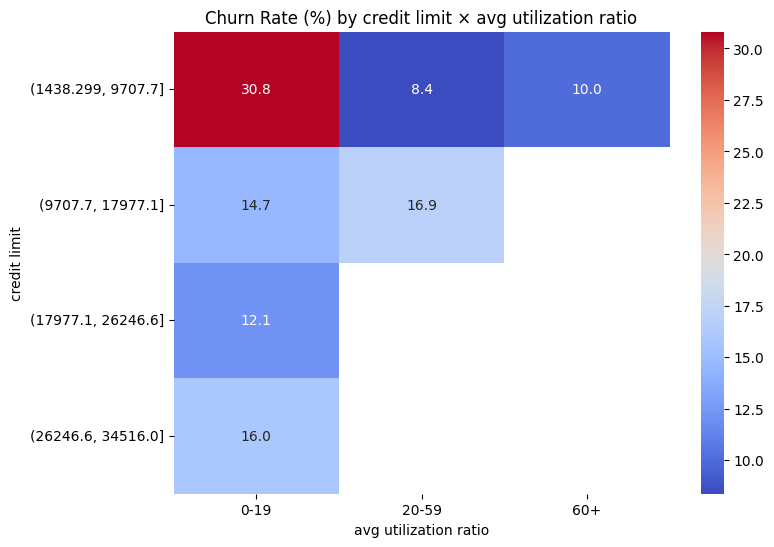

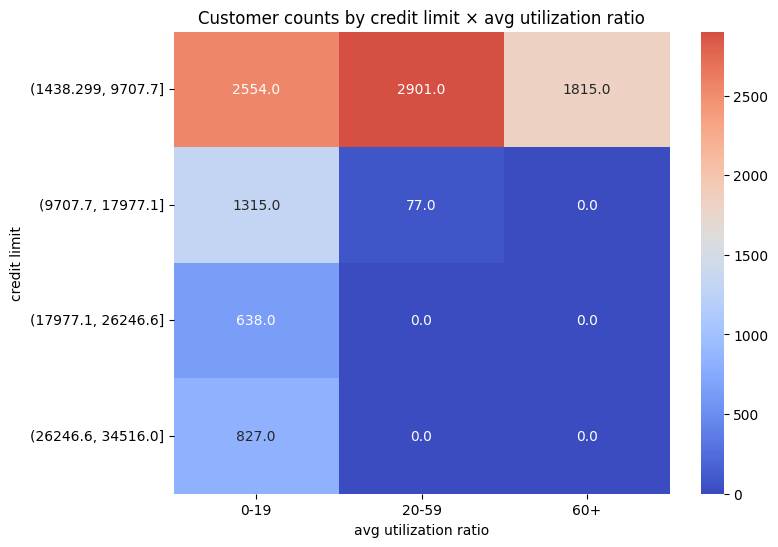

In [ ]:
#credit_limit vs avg_utilization_ratio
pivot_rate = pd.pivot_table(df_cpy,
                            values = 'attrition_flag',
                            index = 'credit_limit',
                            columns = 'avg_utilization_ratio',
                            aggfunc = 'mean')*100

pivot_size = pd.pivot_table(df_cpy,
                            values = 'attrition_flag',
                            index = 'credit_limit',
                            columns = 'avg_utilization_ratio',
                            aggfunc = 'size')

plt.figure(figsize=(8,6))
sns.heatmap(pivot_rate, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Churn Rate (%) by credit limit × avg utilization ratio")
plt.xlabel("avg utilization ratio")
plt.ylabel("credit limit")
plt.savefig("credit_lim_vs_util_rate.png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(pivot_size, annot=True, fmt=".1f", cmap="coolwarm", center=baseline_churn*100)
plt.title("Customer counts by credit limit × avg utilization ratio")
plt.xlabel("avg utilization ratio")
plt.ylabel("credit limit")
plt.savefig("credit_lim_vs_util_size.png", dpi=300, bbox_inches="tight")
plt.show()

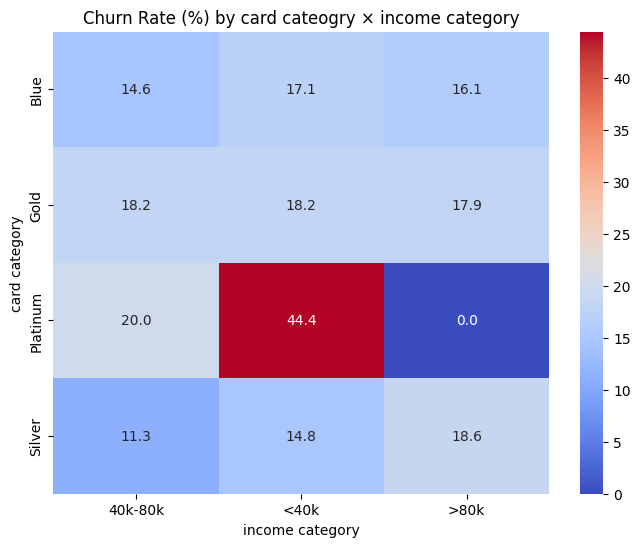

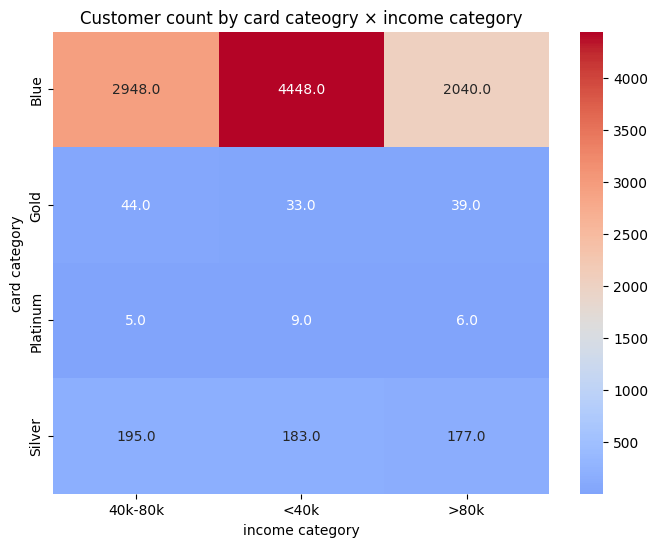

In [ ]:
# card_category × income_category
pivot_rate = pd.pivot_table(df_cpy,
                            values = 'attrition_flag',
                            index = 'card_category',
                            columns = 'income_category',
                            aggfunc = 'mean')*100

pivot_size = pd.pivot_table(df_cpy,
                            values = 'attrition_flag',
                            index = 'card_category',
                            columns = 'income_category',
                            aggfunc = 'size')


plt.figure(figsize=(8,6))
sns.heatmap(pivot_rate, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Churn Rate (%) by card cateogry × income category")
plt.xlabel("income category")
plt.ylabel("card category")
plt.savefig("card_vs_inc_rate.png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(pivot_size, annot=True, fmt=".1f", cmap="coolwarm", center=baseline_churn*100)
plt.title("Customer count by card cateogry × income category")
plt.xlabel("income category")
plt.ylabel("card category")
plt.savefig("card_vs_inc_size.png", dpi=300, bbox_inches="tight")
plt.show()

#Retention Analysis:-
1. Risk Segmentation
2. Segment Churn rate for each risk type
3. Distribution Check (overall vs Churned)

i) **Risk Segmentation**

In [ ]:
def classify_risk(row):
    # HIGH RISK
    if row['education_level'] == "high" and row['income_category'] == '<40k':
        return "High Risk"
    elif row['months_on_book'] == '>48' and row['months_inactive_12_mon'] == '4+':
        return "High Risk"
    elif row['months_on_book'] == '37-48' and row['months_inactive_12_mon'] == '4+':
        return "High Risk"
    elif row['total_relationship_count'] == '1' and row['contacts_count_12_mon'] == '4+':
        return "High Risk"
    elif row['total_relationship_count'] == '2-3' and row['contacts_count_12_mon'] == '4+':
        return "High Risk"
    elif row['credit_limit'].left >= 1438.0 and row['credit_limit'].right <= 9707.7 and row['avg_utilization_ratio'] == '0-19':
        return "High Risk"
    elif row['card_category'] == "Platinum" and (row['income_category'] == '<40k' or (row['income_category'] == '40k-80k')):
        return "High Risk"
    elif row['card_category'] == "Silver" and row['income_category']== '>80k':
        return "High Risk"

    # LOW RISK
    elif row['gender'] == "F" and row['marital_status'] == "Single":
        return "Low Risk"
    elif row['education_level'] == "high" and row['income_category'] == '>80k':
        return "Low Risk"
    elif row['education_level'] == "low":
        return "Low Risk"
    elif row['total_relationship_count'] == '4+' and row['contacts_count_12_mon'] == '4+':
        return "Low Risk"
    elif row['credit_limit'].left >= 26246.6 and row['credit_limit'].right <= 34516.0 and row['avg_utilization_ratio'] == '0-19':
        return "Low Risk"
    elif row['card_category'] == "Blue" and row['income_category'] == '<40k':
        return "Low Risk"
    elif row['card_category'] == "Gold" and (row['income_category'] == '<40k' or row['income_category'] == '40k-80k'):
        return "Low Risk"
    elif row['card_category'] == "Silver" and (row['income_category']== '<40k' or row['income_category']== '40k-80k'):
        return "Low Risk"
    elif row['total_relationship_count'] == '1' and row['contacts_count_12_mon'] == '1-3':
        return "Low Risk"
    elif row['gender'] == "M" and row['marital_status'] == "Married":
        return "Low Risk"
    elif row['education_level'] == "medium" and row['income_category'] == '40k-80k':
        return "Low Risk"
    elif (row['months_on_book'] == '25-36' or row['months_on_book'] == '13-24') and row['months_inactive_12_mon'] == '1-3':
        return "Low Risk"
    elif row['contacts_count_12_mon'] == '0':
        return "Low Risk"
    elif row['credit_limit'].left >= 1438.0 and row['credit_limit'].right <= 9707.7 and (row['avg_utilization_ratio'] == '20-59' or row['avg_utilization_ratio'] == '60+'):
        return "Low Risk"
    elif row['credit_limit'].left >= 9707.7 and row['credit_limit'].right <= 17977.1 and row['avg_utilization_ratio'] == '0-19':
        return "Low Risk"
    elif row['card_category'] == "Blue" and row['income_category'] == '40k-80k':
        return "Low Risk"
    # UNCLASSIFIED
    else:
        return "Unclassified"  # fallback if no rule matches

In [ ]:
df_cpy['risk'] = df_cpy.apply(classify_risk, axis = 1)

ii) **Segment Churn rate for each risk type**

In [ ]:
df_cpy.groupby('risk')['attrition_flag'].mean()*100

,attrition_flag
risk,
High Risk,27.822365
Low Risk,9.188001
Unclassified,9.090909


In [ ]:
def f1 (risk):
  if risk == 'Unclassified':
    return 'Low Risk'
  else:
    return risk

df_cpy['risk'] = df_cpy['risk'].apply(f1)

iii) **Distribution Check (overall vs Churned)**

In [ ]:
risk_dist_overall = df_cpy['risk'].value_counts(normalize=True)*100

In [ ]:
print(risk_dist_overall)

risk
Low Risk     63.088773
High Risk    36.911227
Name: proportion, dtype: float64


In [ ]:
risk_dist_churned=df_cpy[df_cpy['attrition_flag']==1]['risk'].value_counts(normalize=True)*100

In [ ]:
print(risk_dist_churned)

risk
High Risk    63.921328
Low Risk     36.078672
Name: proportion, dtype: float64


In [ ]:
dist_df = pd.DataFrame({
    'overall': risk_dist_overall,
    'churned': risk_dist_churned
}).fillna(0)

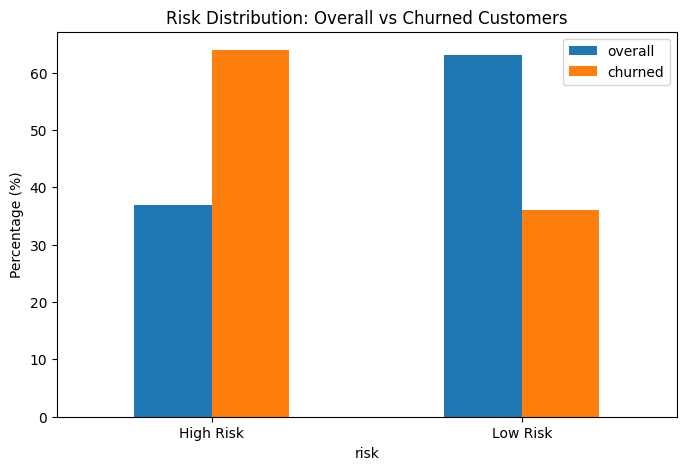

In [ ]:
dist_df.plot(kind='bar', figsize=(8,5))
plt.title("Risk Distribution: Overall vs Churned Customers")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.savefig("risk_dist.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
df_cpy.to_csv("df_cpy.csv", index=False)